# Intro to Machine Learning.

This will be my first machine learning project. I will be using the `scikit-learn` `pandas` `plotly` and `numpy` to do these projects. 

I will accomplish to do the following:
 - Learn about different algorithms
 - How to preprocess data
 - How to perform EDA by using `pandas` `numpy` and `plotly.express`
 - Use `scikit-learn` to use different machine learning algorithms, split the data into training and testing data and to tune the model

I will **not** be learning how to deploy models in this example. That will be done in another repo. I am also following along with the *Machine Learning for Everyone* video which is provided by freeCodeCamp.org. 

In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [18]:
# Importing the Dataset as a csv file and giving the colums labels
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data", names = cols) # names argument gives names to cols. 

df.head() # First 10 rows but can be changed in parenthesses

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [19]:
df['class'].unique()

# g and h stand for gamma rays or hadrons

array(['g', 'h'], dtype=object)

In [21]:
# going to convert g's and h's into one's and zeros (int)

df['class'] = (df['class']=='g').astype(int)

# if 'g' in df['class']:
    # (df['class']=='g').astype(int)

## Goal for Dataset 

By using this dataset, we are trying to predict for future samples wheter the `class` is either `g` for gamma or `h` for hadron. Al of the column labels are known as features in our model. This is going to be useful because I am going to learn what feature selection is. This is an example of supervised learning.

In [32]:
df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,0
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,0
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,0
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,0
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,0


c:\Users\neche\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


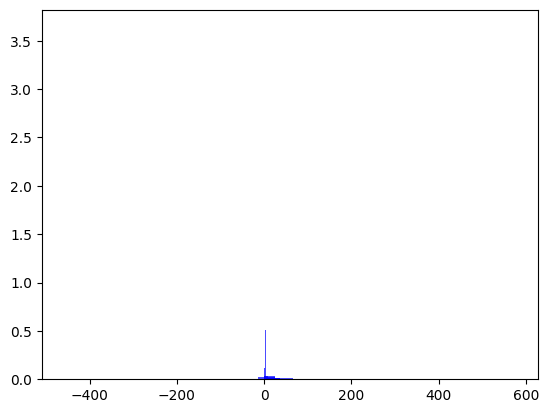

In [31]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["class"]==0][label], color = 'blue', label = 'hadrons', alpha = 0.7, density = True)

### Train, Validation, Test Datasets

In [58]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\neche\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [59]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    
    if oversample:
        # Check the number of classes in the target variable
        if len(np.unique(y)) > 1:
            ros = RandomOverSampler()
            X, y = ros.fit_resample(X, y)
        else:
            print("Warning: The target 'y' needs to have more than 1 class. Skipping oversampling.")
            
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [60]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_train, y_train = scale_dataset(valid, oversample=False)
test, X_train, y_train = scale_dataset(test, oversample=False)

In [61]:
len(y_train)

3804

In [62]:
print(sum(y_train == 1))
print(sum(y_train == 0))

0
3804
